In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define RK4

In [32]:
# The following is standard RK4. It calls a function f(x,y,k) where k is a paramter
def rk4(f, x, y, k,h):    
    k1 = h * f(x, y,k)
    k2 = h * f(x + h / 2, y + k1 / 2,k)
    k3 = h * f(x + h / 2, y + k2 / 2,k)
    k4 = h * f(x + h, y + k3,k)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def call_rk4(f,xlim,yini,k,N):
    
    y = yini
    x1,x2 = xlim
    xs,h = np.linspace(x1,x2,N,retstep=True)
    ys = np.zeros((N,len(yini)),dtype = np.float64)
    
    for i in range(N):
        x= xs[i]
        ys[i,:] = y
        
        y = rk4(f,x,y,k,h)             # for a given k value it gives xs and ys 
    return xs , ys

# Define root fdinding function

In [33]:
# lets find the E value such that  boundary conditions are statisfied it can be done in many ways so many E values are possible

# This is an implementation of the secant method used for finding the root of the function dev. 
def secant(E_guess,f,method,ybound):           # method is a function calculating the deviation and we are finding its zeros.
    E1, E2 = E_guess
    iter = 0
    while abs(method(E2,f,ybound))>tol and iter<max_iter:
        x1 = method(E1,f,ybound)
        x2 = method(E2,f,ybound)
        E1, E2 = E2, E2 - x2*(E2-E1)/(x2-x1)            # the next points 
        iter += 1
        print(iter, E1, E2, method(E2,f,ybound))
    if iter == max_iter:
        return iter, None
    else:
        return iter, E2

# Define normalization factor 

In [34]:
# The following is an implementation of Simpson's 1/3 method (for normalization)
def simp13(y,h):
    store = y[0]**2 + y[-1]**2
    for i in range(2,len(y)):
        if i%2==0:
            store += 4*y[i]**2
        else:
            store += 2*y[i]**2
    return store*(h/3)


# Start the initial definitions

In [35]:
# The potential initialization
def V1(x):
    if abs(x)>1.:
        return 0.0
    else:
        return -Vo*(1. - x**3)/2
    
    

def odef(x,y,E):                            # defining the Schr Eqn into vector form 
    k = E - V1(x);
    return np.array([y[1], -k * y[0]])        # here y[1] we just guess

# lets define a function for deviaiton

In [36]:
def  dev(E,f,y_bound):
    # lets do left side integration of wavefunction
    # lets assume initial conditions for shooting method from left side
    
    y_ini1 = [y_bound[0],0.1]   # here 0.1 is guess which is corrected automatically 
    
    # lets calculate xs and ys using this
    
    xs_l ,ys_l = call_rk4(odef,xlim,y_ini1,E,N)
    # since  potential well starts from -1. to 1.  we need that left turning point near -1. to compare solns from left right 
    # so lets calculate distance of each xs_l from -1.0
    dis_l = abs(xs_l -(-1.))    
    # in these distances we need to locate where there is min distance so as to get the index of it there lies the -1. approxi
    loc_l = np.where(dis_l == np.min(dis_l))[0][0]  # [0][0] to get the index
    
    ###############################################################
    y_ini2 = [y_bound[1],0.1]   # here 0.1 is guess which is corrected automatically 
    
    xs_r ,ys_r = call_rk4(odef,xlim[-1::-1],y_ini2,E,N)    # going from right
    # since  potential well starts from -1. to 1.  we need that left turning point near -1. to compare solns from left right 
    # so lets calculate distance of each xs_r from -1.0
    dis_r = abs(xs_r -(-1.))    
    # in these distances we need to locate where there is min distance so as to get the index of it there lies the -1. approxi
    loc_r = np.where(dis_r == np.min(dis_r))[0][0]  # [0][0] to get the index
    
    
    
    # at that point (turning point) lets do the scaling so that they match since shcr eqn is linear we can scale the whole soln .
    
    scale =  ys_l[loc_l][0]/ys_r[loc_r][0]
    
    # lets scale the right function now they will be equal at htat point 
    
    ys_r = ys_r * scale    
    
    # but we have to check the continuity of derivative at that point which is ys[1] and it should be min zero
    
    return ys_l[loc_l][1] - ys_r[loc_r][1]

 

In [37]:
Vo = 40.

xlim = [-3.,3.]
y_bound = [0.,0.]

y_ini = [y_bound[0] , 0.1]   # this is used after finding the E eigen value

N = 200
max_iter = 50
tol = 1.0e-5

In [38]:
Es = np.linspace(-Vo, 0, 1000);                      # -Vo is least and 0 is highest
devs = [dev(E, odef, y_bound) for E in Es];

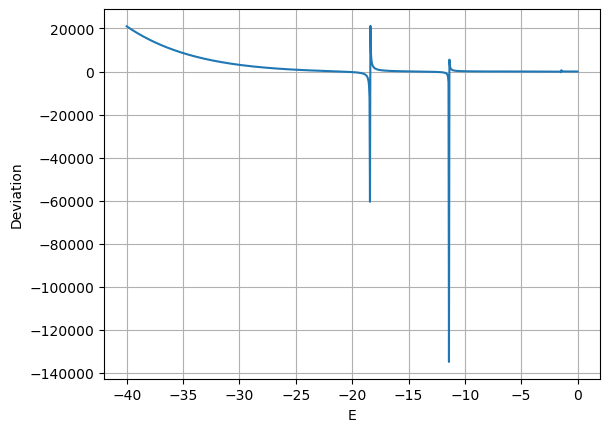

In [39]:
plt.plot(Es,devs)
plt.grid()
plt.xlabel("E")
plt.ylabel("Deviation");

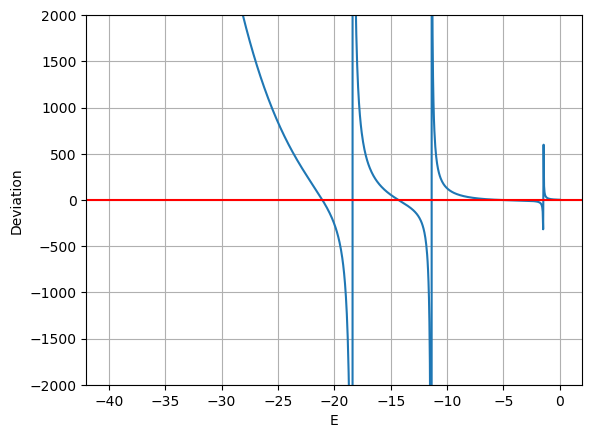

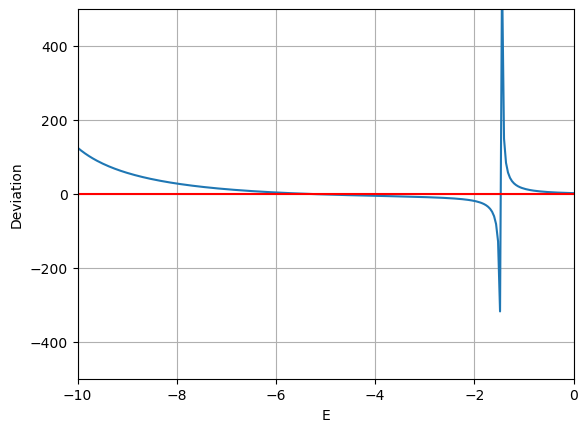

In [41]:
plt.plot(Es,devs)
plt.grid()
plt.xlabel("E")
plt.ylabel("Deviation");
plt.ylim([-2000,2000])
plt.axhline(0,c='r')
plt.show()

plt.plot(Es,devs)
plt.grid()
plt.xlabel("E")
plt.ylabel("Deviation");
plt.ylim([-500,500])
plt.xlim([-10,0])
plt.axhline(0,c='r')
plt.show();

In [11]:
# we see at -25 to -20     and       -18 to -13   and somwhere around -6  to -4

 #  1st eigen value around -25 to -20

In [12]:
E_guess1 = [-25,-20]
iter , E_eigen1 = secant(E_guess1,odef,dev,y_bound)
E_eigen1

1 -20 -21.19607533762913 25.471316839122437
2 -21.19607533762913 -21.090642638178874 4.682422768707795
3 -21.090642638178874 -21.066895320462017 -0.057220057620497755
4 -21.066895320462017 -21.067182013560608 0.0001365122182619416
5 -21.067182013560608 -21.067181331213128 4.021728727821028e-09


-21.067181331213128

1st eigen value -21.067181331213128


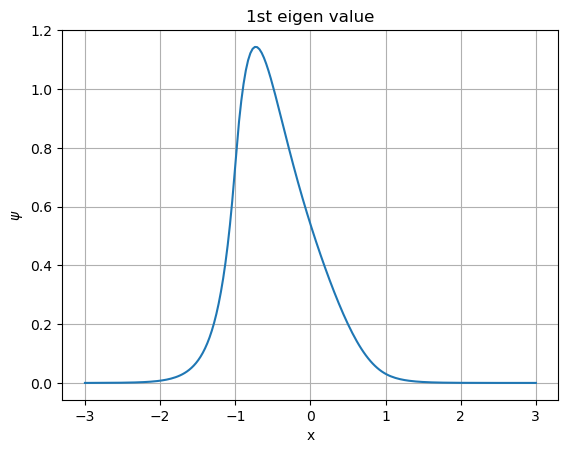

In [13]:
# lets calculate xs and ys using this eighen value
print("1st eigen value",E_eigen1);
xs,ys = call_rk4(odef,xlim,y_ini,E_eigen1,N)
y = ys[:,0]

h = xs[1]-xs[0]
norm1 = simp13(y,h)
y = y/norm1**0.5              # normalizzed psi
plt.plot(xs,y);
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.grid();
plt.title("1st eigen value");


# 2nd eigen value

In [14]:
E_guess2 = [-18,-13]
iter , E_eigen2 = secant(E_guess2,odef,dev,y_bound)
E_eigen2

1 -13 -13.340201385100146 -77.9111882306309
2 -13.340201385100146 -14.119278555037019 -15.529297510317619
3 -14.119278555037019 -14.313221396713447 -0.7976495208205705
4 -14.313221396713447 -14.323722490334477 0.005233255544638382
5 -14.323722490334477 -14.32365404334815 -2.5550552180675368e-06


-14.32365404334815

eigen value -14.32365404334815


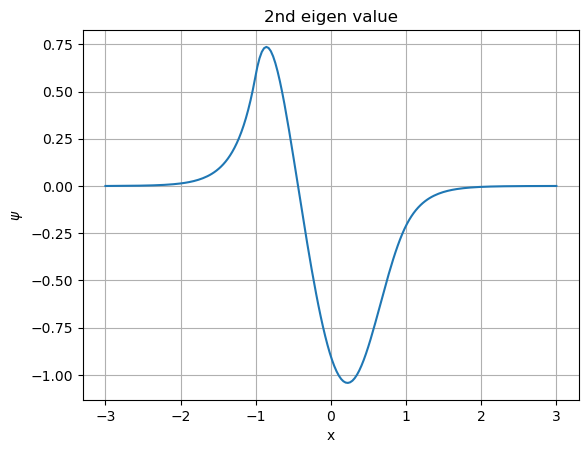

In [15]:
# lets calculate xs and ys using this eighen value
print("eigen value",E_eigen2);
xs,ys = call_rk4(odef,xlim,y_ini,E_eigen2,N)
y = ys[:,0]

h = xs[1]-xs[0]
norm2 = simp13(y,h)
y = y/norm2**0.5             # normalizzed psi
plt.plot(xs,y);
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.grid();
plt.title("2nd eigen value");

# 3rd eigen value 

In [16]:
E_guess3 = [-8,-2]
iter , E_eigen3 = secant(E_guess3,odef,dev,y_bound)
E_eigen3

1 -2 -4.42030518718564 -3.750269636539656
2 -4.42030518718564 -5.016390789734023 -1.4391449031651158
3 -5.016390789734023 -5.3875752370161205 0.30267567395725337
4 -5.3875752370161205 -5.32307461954772 -0.02074090254544636
5 -5.32307461954772 -5.327211083533269 -0.0002803010559659924
6 -5.327211083533269 -5.327267751233078 2.6324531443577825e-07


-5.327267751233078

eigen value -5.327267751233078


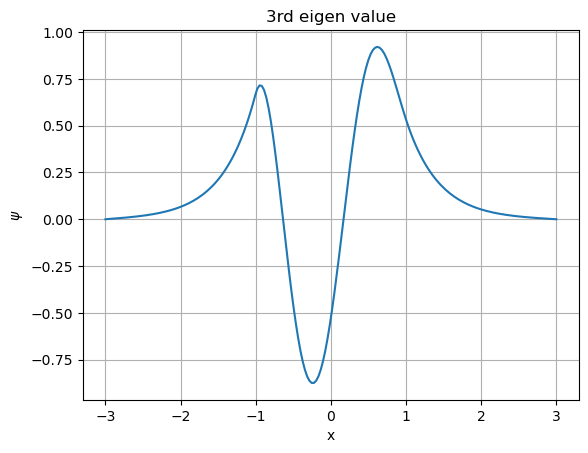

In [17]:
# lets calculate xs and ys using this eighen value
print("eigen value",E_eigen3);
xs,ys = call_rk4(odef,xlim,y_ini,E_eigen3,N)
y = ys[:,0]

h = xs[1]-xs[0]
norm3 = simp13(y,h)
y = y/norm3**0.5             # normalizzed psi
plt.plot(xs,y);
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.grid();
plt.title("3rd eigen value");

# 2nd sub question

# Changing the potential

In [18]:
# The potential initialization
def V2(x):
    return x**2

def odef2(x,y,E):                            # defining the Schr Eqn into vector form 
    k = E - V2(x);
    return np.array([y[1], -k * y[0]])        # here y[1] we just guess

#  changing the turing  point in dev function

In [19]:
def  dev2(E,f,y_bound):
    # lets do left side integration of wavefunction
    # lets assume initial conditions for shooting method from left side
    
    y_ini1 = [y_bound[0],0.1]   # here 0.1 is guess which is corrected automatically 
    
    # lets calculate xs and ys using this
    
    xs_l ,ys_l = call_rk4(odef2,xlim,y_ini1,E,N)
    # since  potential well turingi point is root E      as v(x) = E so x = root E
    # so lets calculate distance of each xs_l from root E
    dis_l = abs(xs_l+E**0.5)    
    # in these distances we need to locate where there is min distance so as to get the index of it there lies the -1. approxi
    loc_l = np.where(dis_l == np.min(dis_l))[0][0]  # [0][0] to get the index
    
    ###############################################################
    y_ini2 = [y_bound[1],0.1]   # here 0.1 is guess which is corrected automatically 
    
    xs_r ,ys_r = call_rk4(odef2,xlim[-1::-1],y_ini2,E,N)    # going from right
    # since  potential well turingi point is root E 
    # so lets calculate distance of each xs_r from from root E
    dis_r = abs(xs_r +E**0.5)    
    # in these distances we need to locate where there is min distance so as to get the index of it there lies the -1. approxi
    loc_r = np.where(dis_r == np.min(dis_r))[0][0]  # [0][0] to get the index
    
    
    
    # at that point (turning point) lets do the scaling so that they match since shcr eqn is linear we can scale the whole soln .
    
    scale =  ys_l[loc_l][0]/ys_r[loc_r][0]
    
    # lets scale the right function now they will be equal at htat point 
    
    ys_r = ys_r * scale    
    
    # but we have to check the continuity of derivative at that point which is ys[1] and it should be min zero
    
    return ys_l[loc_l][1] - ys_r[loc_r][1]


In [20]:
Vo = 40.

xlim = [-5.,5.]
y_bound = [0.,0.]

y_ini = [y_bound[0] , 0.1]   # this is used after finding the E eigen value

N = 200
max_iter = 50
tol = 1.0e-5

In [21]:
Es = np.linspace(0, 10, 2000);                      # 0 is least and  highest is arbitrary
devs = [dev2(E, odef2, y_bound) for E in Es];

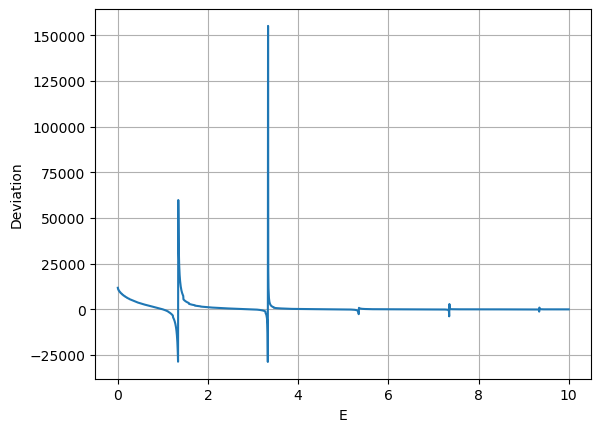

In [22]:
plt.plot(Es,devs)
plt.grid()
plt.xlabel("E")
plt.ylabel("Deviation");


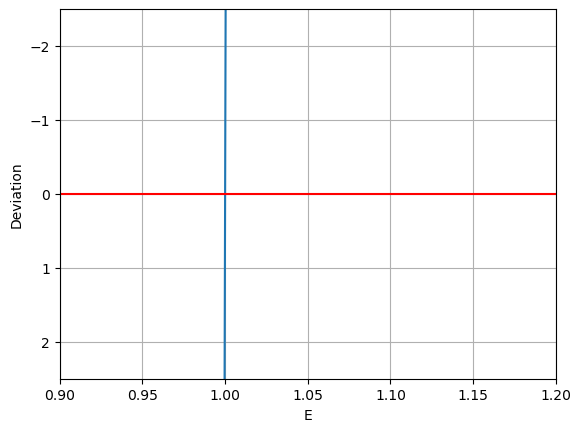

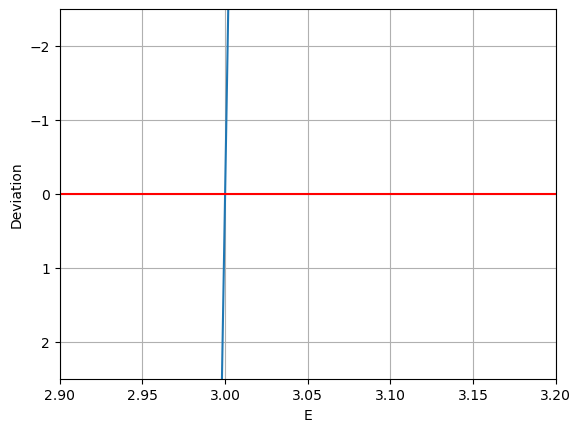

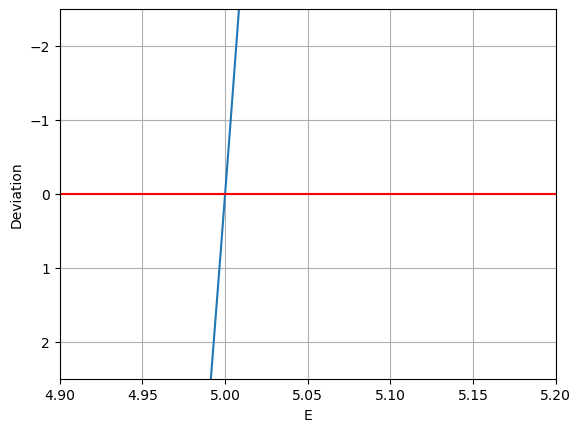

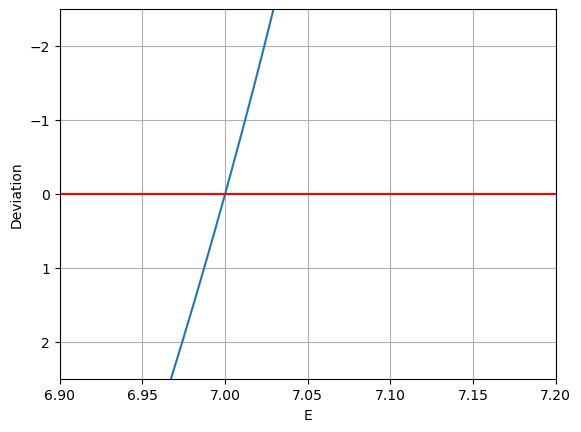

In [23]:
plt.plot(Es,devs)
plt.grid()
plt.xlabel("E")
plt.ylabel("Deviation");
plt.ylim([2.5,-2.5])
plt.xlim([0.9,1.2])
plt.axhline(0,c='r')
plt.show()


plt.plot(Es,devs)
plt.grid()
plt.xlabel("E")
plt.ylabel("Deviation");
plt.ylim([2.5,-2.5])
plt.xlim([2.9,3.2])
plt.axhline(0,c='r')
plt.show()


plt.plot(Es,devs)
plt.grid()
plt.xlabel("E")
plt.ylabel("Deviation");
plt.ylim([2.5,-2.5])
plt.xlim([4.9,5.2])
plt.axhline(0,c='r')
plt.show()

plt.plot(Es,devs)
plt.grid()
plt.xlabel("E")
plt.ylabel("Deviation");
plt.ylim([2.5,-2.5])
plt.xlim([6.9,7.2])
plt.axhline(0,c='r')
plt.show()




In [24]:
E_guess11 = [0,1.1]
iter , E_eigen11 = secant(E_guess11,odef2,dev2,y_bound)
E_eigen11

1 1.1 1.017352378604242 -146.46438313283966
2 1.017352378604242 1.0024832004439386 -19.542069609376313
3 1.0024832004439386 1.0001938117101825 -1.5212593036892486
4 1.0001938117101825 1.000000548818453 -0.003786751735560756
5 1.000000548818453 1.000000066543772 -7.329001618927578e-07


1.000000066543772

1st eigen value 1.000000066543772


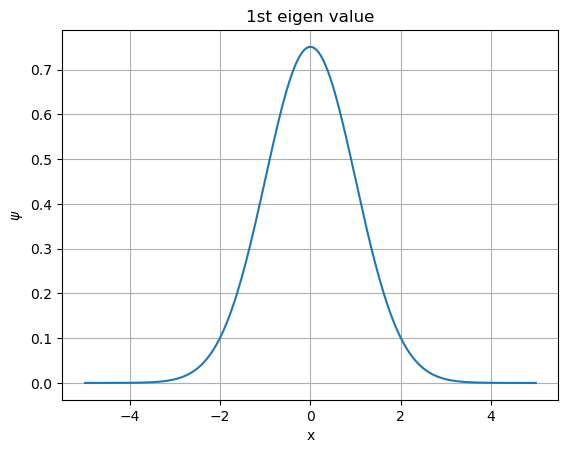

In [25]:
# lets calculate xs and ys using this eighen value
print("1st eigen value",E_eigen11);
xs,ys = call_rk4(odef2,xlim,y_ini,E_eigen11,N)
y = ys[:,0]

h = xs[1]-xs[0]
norm11 = simp13(y,h)
y = y/norm11**0.5              # normalizzed psi
plt.plot(xs,y);
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.grid();
plt.title("1st eigen value");

In [26]:
E_guess12 = [2.9,3.1]
iter , E_eigen12 = secant(E_guess12,odef2,dev2,y_bound)
E_eigen12

1 3.1 2.97773341111509 28.340462533135025
2 2.97773341111509 2.994729047821377 6.879558567434685
3 2.994729047821377 3.000177209664821 -0.23186877525867544
4 3.000177209664821 2.9999995718217867 0.0018794988457955242
5 2.9999995718217867 3.0000010001537056 5.122410584590398e-07


3.0000010001537056

 eigen value 3.0000010001537056


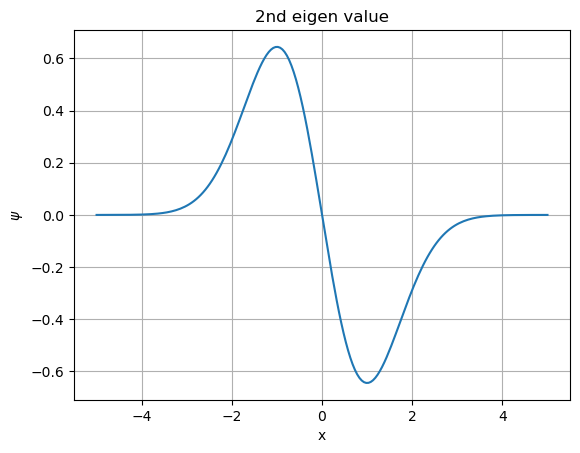

In [27]:
# lets calculate xs and ys using this eighen value
print(" eigen value",E_eigen12);
xs,ys = call_rk4(odef2,xlim,y_ini,E_eigen12,N)
y = ys[:,0]

h = xs[1]-xs[0]
norm12 = simp13(y,h)
y = y/norm12**0.5              # normalizzed psi
plt.plot(xs,y);
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.grid();
plt.title("2nd eigen value");

In [28]:
E_guess13 = [4.9,5.2]
iter , E_eigen13 = secant(E_guess13,odef2,dev2,y_bound)
E_eigen13

1 5.2 4.951132328312697 13.300011172659609
2 4.951132328312697 4.975306936140512 6.974118969538971
3 4.975306936140512 5.001958764154582 -0.5769477638624139
4 5.001958764154582 4.9999224011984 0.02414148764957247
5 4.9999224011984 5.00000418744068 8.205006346173604e-05
6 5.00000418744068 5.000004466356859 -1.1687589562825451e-08


5.000004466356859

 eigen value 5.000004466356859


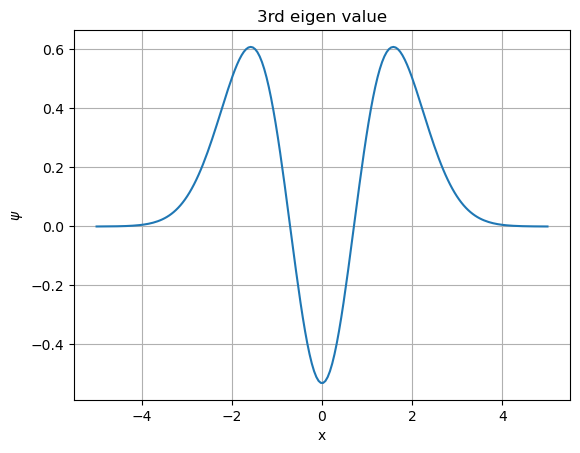

In [29]:
# lets calculate xs and ys using this eighen value
print(" eigen value",E_eigen13);
xs,ys = call_rk4(odef2,xlim,y_ini,E_eigen13,N)
y = ys[:,0]

h = xs[1]-xs[0]
norm13 = simp13(y,h)
y = y/norm13**0.5              # normalizzed psi
plt.plot(xs,y);
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.grid();
plt.title("3rd eigen value");
